In [ ]:
import pandas as pd
import numpy as np
from folium import plugins, Map, Marker
from folium.plugins import HeatMap

df = pd.read_csv("listings.csv", low_memory=False)
base_map = Map(location = [40.693943, -73.985880])
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
df['price'] = df['price'].astype(float)
mean = df.groupby(['latitude', 'longitude'], as_index=False)['price'].mean()
HeatMap(mean).add_to(base_map)
base_map.save("index.html")

<AxesSubplot: xlabel='room_type'>

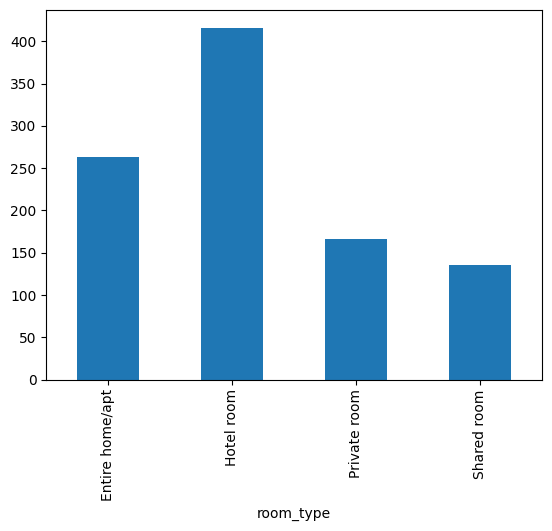

In [113]:
room_type = df.groupby(['room_type'])['price'].mean()
room_type.plot(kind='bar')

In [104]:
top_reviewed_listings = Map()
top_reviewed = df.nlargest(10,'number_of_reviews')
map = Map(location = [40.693943, -73.985880])
for i in range(0,len(top_reviewed)):
   Marker(
      location=[top_reviewed.iloc[i]['latitude'], top_reviewed.iloc[i]['longitude']],
      popup=top_reviewed.iloc[i]['name'],
   ).add_to(map)
map.save('top_reviewed_listings.html')

In [105]:
from sklearn.cluster import KMeans 
from folium import Circle
listings_map = Map(location = [40.693943, -73.985880])
df_for_clustering = df.loc[:,['longitude', 'latitude', 'price', 'number_of_reviews']]
kmeans = KMeans(n_clusters=5,n_init='auto')
kmeans.fit(df_for_clustering)
df_for_clustering.loc[:,'cluster'] = kmeans.labels_.astype(int)
colors = ['red', 'blue', 'green', 'purple', 'orange']
for index, row in df_for_clustering.iterrows():
    Circle(
        fill = True,
        color = colors[row['cluster'].astype(int)],
        fill_color = colors[row['cluster'].astype(int)],
        location=[row['latitude'], row['longitude']],
    ).add_to(listings_map)
listings_map.save("map_clusters.html")

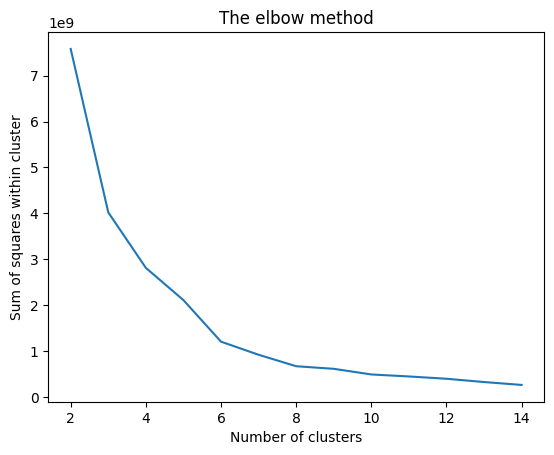

In [106]:
import matplotlib.pyplot as plt

inertia=[]
for n_clusters in range(2,15):
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=1)
    cluster = clusterer.fit(df_for_clustering)
    inertia.append(cluster.inertia_)
plt.plot(range(2,15),inertia)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squares within cluster")

plt.show()


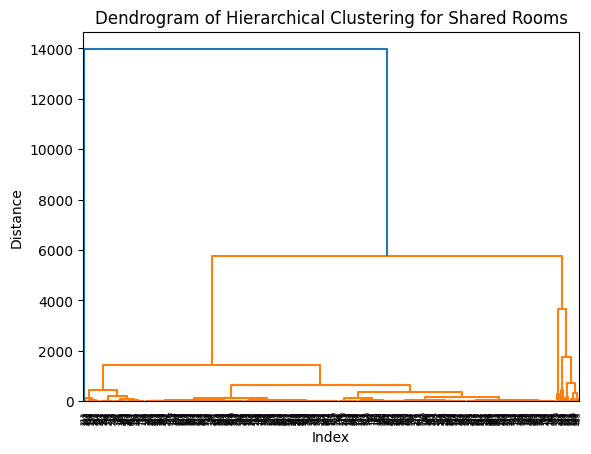

In [107]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
shared_room = df[df['room_type'] == 'Shared room']
X = shared_room[['longitude', 'latitude', 'price']]
linkage_matrix = hierarchy.linkage(X,method="ward")
hierarchy.dendrogram(linkage_matrix)
plt.title('Dendrogram of Hierarchical Clustering for Shared Rooms')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

C:\Users\hanie\AppData\Local\Temp\ipykernel_23872\2914223366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['longitude'] = (X['longitude'] - X['longitude'].mean())/X['longitude'].std()
C:\Users\hanie\AppData\Local\Temp\ipykernel_23872\2914223366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['latitude'] = (X['latitude'] - X['latitude'].mean())/X['latitude'].std()
C:\Users\hanie\AppData\Local\Temp\ipykernel_23872\2914223366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

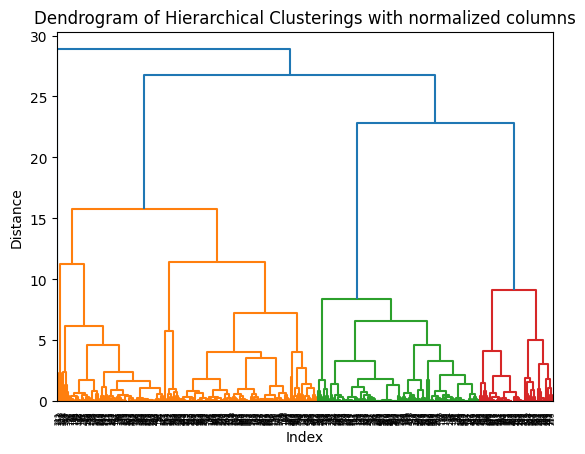

In [108]:
X['longitude'] = (X['longitude'] - X['longitude'].mean())/X['longitude'].std()
X['latitude'] = (X['latitude'] - X['latitude'].mean())/X['latitude'].std()
X['price'] = (X['price'] - X['price'].mean())/X['price'].std()
linkage_matrix = hierarchy.linkage(X,method="ward")
hierarchy.dendrogram(linkage_matrix)
plt.title('Dendrogram of Hierarchical Clusterings with normalized columns')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()